# California Housing Dataset for House Price Prediction

California housing data set  contains data drawn from the 1990 U.S. Census, where they collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. They computed distances among the centroids of each block group as measured in latitude and longitude, and excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 characteristics.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Data Set Characteristics:


Dataset size: 20640


Attributes: 

1. MedInc:- Median Income in block

2. HouseAge:- Median House Age in block

3. AveRooms:- Average Rooms in block

4. AveBedrms:- Average Bedrooms in block

5. Population:- Population of block

6. AveOccup:- Average House Occupancy

7. Latitude:- Latitude of House

8. Longitude:- Longitude of House


Output: 

Median House Value

## Split data into Validation Data, Test Data and Train Data

In [5]:
from sklearn.model_selection import train_test_split
X_train_entire, X_test, Y_train_entire, Y_test = train_test_split(housing.data, housing.target, random_state=40)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_entire, Y_train_entire, random_state=40)

## Standardize the data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [7]:
np.random.seed(40)
tf.random.set_seed(40)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


## Stop after 10 Consecutive Validation Losses don't increase

In [11]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_California_Housing.h5", save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [12]:
model_history=model.fit(X_train, Y_train, 
                        epochs=500, 
                        validation_data=(X_valid, Y_valid), 
                        callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/500
11610/11610 [==============================] - 1s 95us/sample - loss: 1.4491 - mae: 0.8325 - val_loss: 0.7594 - val_mae: 0.6444
Epoch 2/500
11610/11610 [==============================] - 1s 53us/sample - loss: 0.7288 - mae: 0.6254 - val_loss: 0.6650 - val_mae: 0.6060
Epoch 3/500
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6626 - mae: 0.5977 - val_loss: 0.6198 - val_mae: 0.5864
Epoch 4/500
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6273 - mae: 0.5781 - val_loss: 0.5900 - val_mae: 0.5668
Epoch 5/500
11610/11610 [==============================] - 1s 71us/sample - loss: 0.6008 - mae: 0.5637 - val_loss: 0.5685 - val_mae: 0.5507
Epoch 6/500
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5800 - mae: 0.5511 - val_loss: 0.5491 - val_mae: 0.5424
Epoch 7/500
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5616 - mae: 0.5413 - val_lo

Epoch 59/500
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3725 - mae: 0.4312 - val_loss: 0.3648 - val_mae: 0.4326
Epoch 60/500
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3712 - mae: 0.4307 - val_loss: 0.3640 - val_mae: 0.4327
Epoch 61/500
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3702 - mae: 0.4300 - val_loss: 0.3634 - val_mae: 0.4346
Epoch 62/500
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3690 - mae: 0.4295 - val_loss: 0.3631 - val_mae: 0.4291
Epoch 63/500
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3680 - mae: 0.4284 - val_loss: 0.3613 - val_mae: 0.4310
Epoch 64/500
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3671 - mae: 0.4280 - val_loss: 0.3612 - val_mae: 0.4309
Epoch 65/500
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3657 - mae: 0.4270 - val_loss: 0.3603 - val_mae: 0.4305
Epoch 66/500


Epoch 117/500
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3344 - mae: 0.4070 - val_loss: 0.3328 - val_mae: 0.4118
Epoch 118/500
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3339 - mae: 0.4064 - val_loss: 0.3339 - val_mae: 0.4099
Epoch 119/500
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3337 - mae: 0.4064 - val_loss: 0.3317 - val_mae: 0.4105
Epoch 120/500
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3333 - mae: 0.4061 - val_loss: 0.3318 - val_mae: 0.4080
Epoch 121/500
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3329 - mae: 0.4057 - val_loss: 0.3312 - val_mae: 0.4086
Epoch 122/500
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3322 - mae: 0.4052 - val_loss: 0.3314 - val_mae: 0.4093
Epoch 123/500
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3319 - mae: 0.4050 - val_loss: 0.3310 - val_mae: 0.4110
Epoch 

Epoch 232/500
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3008 - mae: 0.3818 - val_loss: 0.3061 - val_mae: 0.3906
Epoch 233/500
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3006 - mae: 0.3823 - val_loss: 0.3073 - val_mae: 0.3870
Epoch 234/500
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3005 - mae: 0.3814 - val_loss: 0.3068 - val_mae: 0.3884
Epoch 235/500
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3003 - mae: 0.3815 - val_loss: 0.3064 - val_mae: 0.3930
Epoch 236/500
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3003 - mae: 0.3816 - val_loss: 0.3063 - val_mae: 0.3905
Epoch 237/500
11610/11610 [==============================] - 1s 45us/sample - loss: 0.2998 - mae: 0.3814 - val_loss: 0.3065 - val_mae: 0.3902
Epoch 238/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.2998 - mae: 0.3815 - val_loss: 0.3066 - val_mae: 0.3870
Epoch 

Epoch 290/500
11610/11610 [==============================] - 1s 56us/sample - loss: 0.2917 - mae: 0.3755 - val_loss: 0.2998 - val_mae: 0.3826
Epoch 291/500
11610/11610 [==============================] - 1s 60us/sample - loss: 0.2917 - mae: 0.3746 - val_loss: 0.3000 - val_mae: 0.3842
Epoch 292/500
11610/11610 [==============================] - 1s 57us/sample - loss: 0.2917 - mae: 0.3753 - val_loss: 0.2993 - val_mae: 0.3862
Epoch 293/500
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2914 - mae: 0.3748 - val_loss: 0.3015 - val_mae: 0.3837
Epoch 294/500
11610/11610 [==============================] - 1s 56us/sample - loss: 0.2912 - mae: 0.3747 - val_loss: 0.3000 - val_mae: 0.3852
Epoch 295/500
11610/11610 [==============================] - 1s 56us/sample - loss: 0.2914 - mae: 0.3754 - val_loss: 0.2995 - val_mae: 0.3818
Epoch 296/500
11610/11610 [==============================] - 1s 55us/sample - loss: 0.2910 - mae: 0.3743 - val_loss: 0.3011 - val_mae: 0.3818
Epoch 

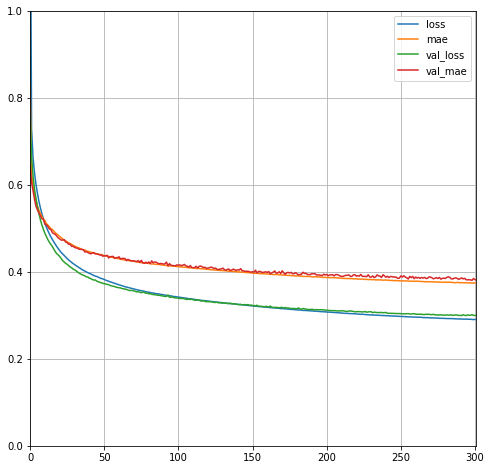

In [13]:
model=keras.models.load_model("Best_California_Housing.h5")
pd.DataFrame(model_history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, Y_test)

5160/5160 [==============================] - 0s 50us/sample - loss: 0.3194 - mae: 0.3893


[0.31935370213301606, 0.38933682]

In [15]:
model.save("California_Housing.h5")